In [13]:
from skimage import io, color, feature
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [9]:
panaroma_path = 'panorama.jpg'
template_path = 'template.jpg'
panaroma = io.imread(panaroma_path)
template = io.imread(template_path)

In [10]:
panaroma_gray = color.rgb2gray(panaroma)
template_gray = color.rgb2gray(template)

In [11]:
result = feature.match_template(panaroma_gray, template_gray)

In [12]:
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print(x, y)

3798 2


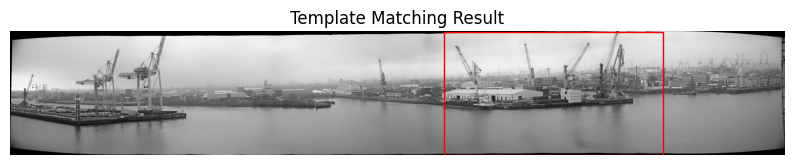

In [14]:
# Visualize the result
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(panaroma_gray, cmap='gray')
rect = patches.Rectangle((x, y), template_gray.shape[1], template_gray.shape[0], edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.set_title('Template Matching Result')
ax.axis('off')
plt.show()

In [16]:
 # Flip the template horizontally
template_gray_flipped = np.fliplr(template_gray)

# Perform template matching with the flipped template
result_flipped = feature.match_template(panaroma_gray, template_gray_flipped, pad_input=True)

# Find the coordinates of the highest correlation for the flipped template
ij_flipped = np.unravel_index(np.argmax(result_flipped), result_flipped.shape)
x_flipped, y_flipped = ij_flipped[::-1]

NameError: name 'x_flipped' is not defined

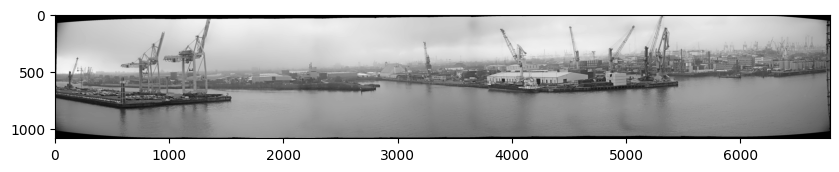

In [ ]:
# Visualize the matching result for the flipped template
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(panaroma_gray, cmap='gray')
rect_flipped = patches.Rectangle((x_flipped, y_flipped), template_gray_flipped.shape[1], template_gray_flipped.shape[0], edgecolor='blue', facecolor='none')
ax.add_patch(rect_flipped)
ax.set_title('Template Matching Result with Flipped Template')
ax.axis('off')
plt.show()